#SEGUNDA EVALUACIÓN
Simulación Digital 22974 | Semestre 2022-1

Temas cubiertos: Simulación de eventos discretos, Cadenas de Markov, Cadenas de Markov Monte
Carlo.

###INTEGRANTES:
* Daniel Baez Acevedo -2182815
* María Paula Rodríguez Jerez - 2152012
* Nicolas Stiven Jaimes Duarte - 2182688
* Yurieth Najhery Soler Maldonado - 2182696


In [ ]:
import random as rnd
import math 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from cmath import exp
from math import log, e
import scipy.stats as stat2
from random import random
from math import e, log, factorial

1. Construir un programa que simule un sistema de colas con un solo servidor con dos colas, una de
ellas con prioridad. Entregar el código fuente con los comentarios necesarios para explicar el
proceso. El programa debe al menos entregar datos de espera promedio para los usuarios de cada
cola.

In [ ]:
def contar_elemento(lista, e):
   contador=0
   for i in lista:
      if i == e:
         contador+=1
   return contador

In [ ]:
T = 480 # Tiempo que dura el banco abierto ( 8 horas )
llegada1 = 0 # tiempo en que llega una persona - COLA 1
llegada2 = 0 # tiempo en que llega una persona - COLA 2
n = 0 # Cantidad de personas atendidas
salida = 0 # Tiempo de salida
lamda_llegada_1 = 0.2 #12 personas por hora - COLA 1 (COLA DE PRIORIDAD)
lamda_llegada_2 = 0.5 #30 personas por hora - COLA 2
lamda_atencion = 0.4 #24 personas por hora

entre_llegadas_1 = [] # Lista para guardar el tiempo que dura en llegar una persona con respecto a la otra - COLA 1
entre_llegadas_2 = [] # Lista para guardar el tiempo que dura en llegar una persona con respecto a la otra - COLA 2
llegadas_1 = [] # Lista para guardar los tiempos de llegada
llegadas_2 = [] # Lista para guardar los tiempos de llegada

atenciones = [] # Lista para guardar los tiempos de atencion
salidas = [] # Lista para guardar el tiempo de salida de las personas
tiempo_esperas_1 = [] # Lista para guardar el tiempo de espera de las personas - COLA 1
tiempo_esperas_2 = [] # Lista para guardar el tiempo de espera de las personas - COLA 2
lista_atencion=[]

tiempo_total_persona_1=[] # Lista para guardar el tiempo total que demoran las personas - COLA 1
tiempo_total_persona_2=[] # Lista para guardar el tiempo total que demoran las personas - COLA 2

tiempo_esperas=[]
tiempo_total_persona=[]

while salida <= T : 

  entre_llegada_1 = -(1/lamda_llegada_1) * math.log( rnd.random() ) # Se generan las entre_llegadas - COLA 1
  entre_llegada_2 = -(1/lamda_llegada_2) * math.log( rnd.random() ) # Se generan las entre_llegadas - COLA 2

  llegada1 += entre_llegada_1 # Se suman los tiempos entre_llegadas para saber el tiempo de cada llegada - COLA 1
  llegadas_1.append( round(llegada1, 3) ) # Se guardan las llegadas
  entre_llegadas_1.append( round(entre_llegada_1, 3) ) # Se guardan las entre_llegadas

  llegada2 += entre_llegada_2 # Se suman los tiempos entre_llegadas para saber el tiempo de cada llegada - COLA 2
  llegadas_2.append( round(llegada2, 3) ) # Se guardan las llegadas
  entre_llegadas_2.append( round(entre_llegada_2, 3) ) # Se guardan las entre_llegadas

  atencion = -(1/lamda_atencion) * math.log( rnd.random() ) # Se generan los tiempos de atencion del servidor
  atenciones.append( round(atencion, 3) ) # Se guardan los tiempos de atencion

  #PRIMERA ATENCIÓN DEL DÍA
  if salida == 0 :   
    if llegada2<llegada1:
      lista_atencion.append(2)
      llegada = llegada2
      tiempo_esperas_1.append(0)
      tiempo_total_persona_1.append(round(tiempo_esperas_1[-1]+atencion ,3))
    else:
      lista_atencion.append(1)
      llegada = llegada1
      tiempo_esperas_2.append(0)
      tiempo_total_persona_2.append(round(tiempo_esperas_2[-1]+atencion ,3))
    salida = llegada + atencion

  #EL RESTO DE ATENCIONES
  else :
    iter1=contar_elemento(lista_atencion, 1)
    iter2=contar_elemento(lista_atencion, 2)

    #PERSONAS EN COLA
    if llegadas_1[iter1]<=salida: #PRIORIDAD - atención cola 1
      salida += atencion
      lista_atencion.append(1)
      llegada = llegadas_1[iter1]
      tiempo_esperas_1.append( round(salida - ( llegada + atencion ), 3) )
      tiempo_total_persona_1.append(round(tiempo_esperas_1[-1]+atencion ,3))
    elif llegadas_2[iter2]<=salida: #atención cola 2
      salida += atencion
      lista_atencion.append(2)
      llegada = llegadas_2[iter2]
      tiempo_esperas_2.append( round(salida - ( llegada + atencion ), 3) )
      tiempo_total_persona_2.append(round(tiempo_esperas_2[-1]+atencion ,3))

    #COLA VACÍA DURANTE CIERTO TIEMPO
    elif llegadas_1[iter1]>salida and llegadas_1[iter1]<llegadas_2[iter2]: #PRIORIDAD - atención cola 1
      salida = llegadas_1[iter1] + atencion
      lista_atencion.append(1)
      llegada = llegadas_1[iter1]
      tiempo_esperas_1.append( round(salida - ( llegada + atencion ), 3) )
      tiempo_total_persona_1.append(round(tiempo_esperas_1[-1]+atencion ,3))
    else: #atención cola 2
      salida = llegadas_2[iter2] + atencion
      lista_atencion.append(2)
      llegada = llegadas_2[iter2]
      tiempo_esperas_2.append( round(salida - ( llegada + atencion ), 3) )
      tiempo_total_persona_2.append(round(tiempo_esperas_2[-1]+atencion ,3))
  
  salidas.append( round(salida, 3) )
  tiempo_esperas.append( round(salida - ( llegada + atencion ), 3) )
  tiempo_total_persona.append(round(tiempo_esperas[-1]+atencion ,3))

In [ ]:
data={
    'entre_llegadas_1':entre_llegadas_1,
    'llegadas_1':llegadas_1,
    'entre_llegadas_2':entre_llegadas_2,
    'llegadas_2':llegadas_2,
    'cola_atendida':lista_atencion,
    'tiempo_atención':atenciones,
    'salidas':salidas,
    'tiempo_espera':tiempo_esperas,
    'tiempo_total_persona':tiempo_total_persona,
}
dataframe=pd.DataFrame(data)
dataframe

,entre_llegadas_1,llegadas_1,entre_llegadas_2,llegadas_2,cola_atendida,tiempo_atención,salidas,tiempo_espera,tiempo_total_persona
0,13.618,13.618,0.088,0.088,2,2.846,2.934,0.000,2.846
1,6.025,19.642,0.406,0.494,2,1.431,4.365,2.440,3.871
2,15.033,34.675,2.044,2.538,2,1.027,5.392,1.827,2.854
3,0.410,35.085,2.369,4.907,2,4.140,9.533,0.485,4.625
4,2.869,37.954,3.320,8.227,2,3.207,12.739,1.306,4.513
...,...,...,...,...,...,...,...,...,...
181,3.556,922.389,1.507,400.042,1,6.060,474.338,8.240,14.300
182,4.262,926.650,0.459,400.501,1,1.628,475.965,7.018,8.646
183,2.253,928.903,6.756,407.258,1,3.553,479.519,6.562,10.115
184,0.140,929.043,2.380,409.637,1,0.165,479.684,6.639,6.804


In [ ]:
print( 'Cantidad de personas atendidas: ', len(lista_atencion) )
print( 'Cantidad de personas atendidas COLA 1: ', contar_elemento(lista_atencion, 1) )
print( 'Cantidad de personas atendidas COLA 2: ', contar_elemento(lista_atencion, 2) )

print("\nÚltima salida esperada del servidor:", T)
print("Última salida real del servidor:", salida)

print('\nTiempo promedio de atención:', np.mean(atenciones))
print('Cantidad de personas atendidas por hora en el servidor:', len(lista_atencion)/8)

print('\nTiempo del servidor ocupado: ', round(sum(atenciones) ,3) )
print('Tiempo del servidor desocupado: ', round(salida-sum(atenciones) ,3) )

print('\nTiempo de espera promedio COLA 1: ', round(np.mean(tiempo_esperas_1) ,3) )
print('Tiempo de espera promedio COLA 2: ', round(np.mean(tiempo_esperas_2) ,3) )

print('\nTiempo promedio que gastan en total las personas COLA 1: ', round(np.mean(tiempo_total_persona_1) ,3) )
print('Tiempo promedio que gastan en total las personas COLA 2: ', round(np.mean(tiempo_total_persona_2) ,3) )

Cantidad de personas atendidas:  186
Cantidad de personas atendidas COLA 1:  93
Cantidad de personas atendidas COLA 2:  93

Última salida esperada del servidor: 480
Última salida real del servidor: 482.8559142189264

Tiempo promedio de atención: 2.5951182795698924
Cantidad de personas atendidas por hora en el servidor: 23.25

Tiempo del servidor ocupado:  482.692
Tiempo del servidor desocupado:  0.164

Tiempo de espera promedio COLA 1:  4.111
Tiempo de espera promedio COLA 2:  117.64

Tiempo promedio que gastan en total las personas COLA 1:  6.769
Tiempo promedio que gastan en total las personas COLA 2:  120.171


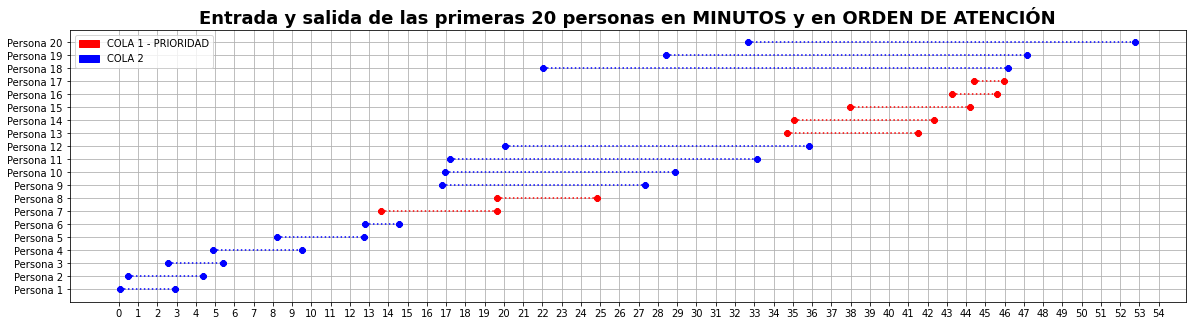

In [ ]:
inicio=0
fin=20

fig , ax1 = plt.subplots(figsize=(20,5))

j=0
k=0
for i in range(inicio,fin):
  if lista_atencion[i]==2:
    x = [llegadas_2[j], salidas[i]]
    y=[i,i]
    j=j+1
    ax1.plot(x, y, "8:", color="b")
  else:
    x = [llegadas_1[k], salidas[i]]
    y=[i,i]
    k=k+1
    ax1.plot(x, y, "8:", color="r")

ax1.set_yticks(np.arange(inicio, fin, 1))
labels = ("Persona {}".format(n+1) for n in range(inicio, fin))
ax1.set_yticklabels(labels)

ax1.set_xticks(np.arange(0, np.max(salidas[inicio:fin])+2, 1))

plt.title("Entrada y salida de las primeras 20 personas en MINUTOS y en ORDEN DE ATENCIÓN", 
          fontdict={'weight': 'bold',
                    'size': 18})

red_patch = mpatches.Patch(color='red', label='COLA 1 - PRIORIDAD')
red_patch2 = mpatches.Patch(color='blue', label='COLA 2')
plt.legend(handles=[red_patch, red_patch2])

plt.grid()
fig.show()

2. Realizar los incisos a y b del ejercicio 16.5-8 del Libro de Hillier y Lieberman. Después de esto,
construya un programa que simule ese sistema de inventarios usando el enfoque de eventos
discretos. Idee una manera de calcular el costo promedio de inventario y de incumplimiento a largo
plazo.

**Ejercicio 16.5-8**

Considere la siguiente política de inventarios para cierto producto. Si la demanda durante un periodo excede el número de unidades disponibles, esta demanda insatisfecha se considera como un faltante y se surte cuando se recibe la siguiente orden. Sea Zn
(n=0,1,...) la cantidad de inventario menos el número de unidades faltantes antes de ordenar al final del siguiente periodo n (Z0=0).
Si Zn es cero o positivo, no hay pedidos atrasados. Si Zn es negativo, entonces –Zn representa el número de unidades faltantes y el inventario es 0. Si al final del periodo n, Zn<1, se hace un pedido de 2m
unidades, donde m es el entero más pequeño tal que Zn+2m>=1. Las órdenes se surten de inmediato.

Sean D1,D2,..., las demandas respectivas de un producto en los periodos 1,2,... Suponga que las Dn son variables aleatorias, independientes e idénticamente distribuidas que toman los valores 0,1, 2,3,4, cada uno con probabilidad 1/5. Sea Xn la cantidad en inventario después de ordenar al final del periodo n (con X0=2), entonces

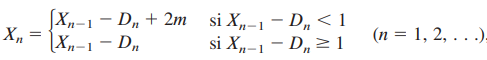

donde Xn (n=0,1,...) es una cadena de Markov. Tiene sólo dos estados, 1 y 2, ya que sólo se ordena cuando Zn=0,–1,–2 o -3, en cuyo caso se pide 2,2,4 y 4 unidades, con lo que queda Xn=2,1,2,1, respectivamente.

**Ejercicio a)** Encuentre la matriz de transición (de un paso)

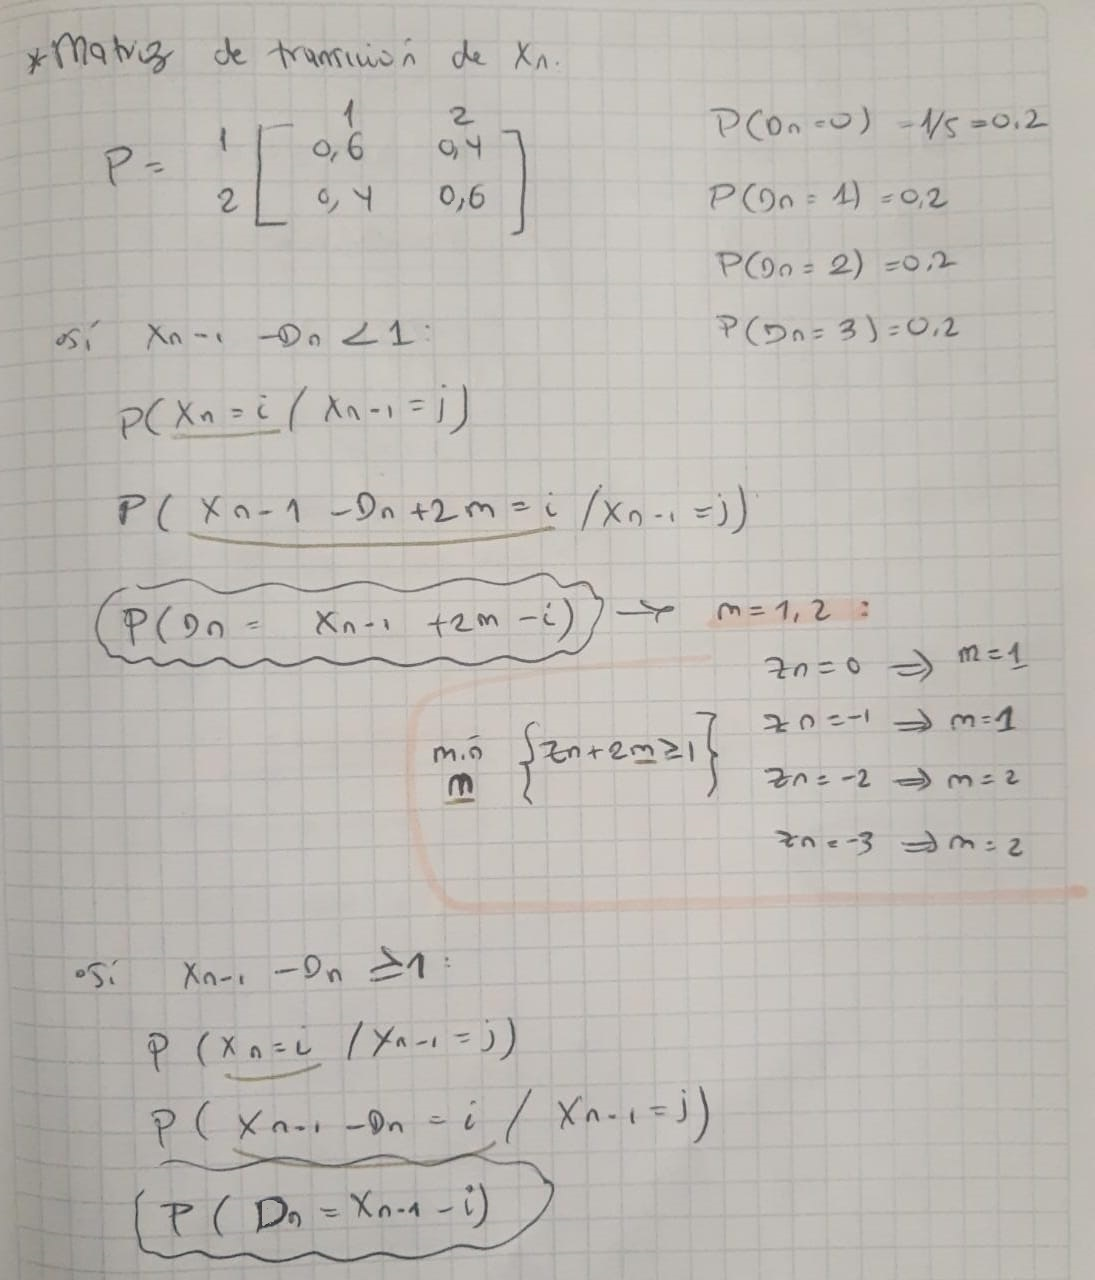

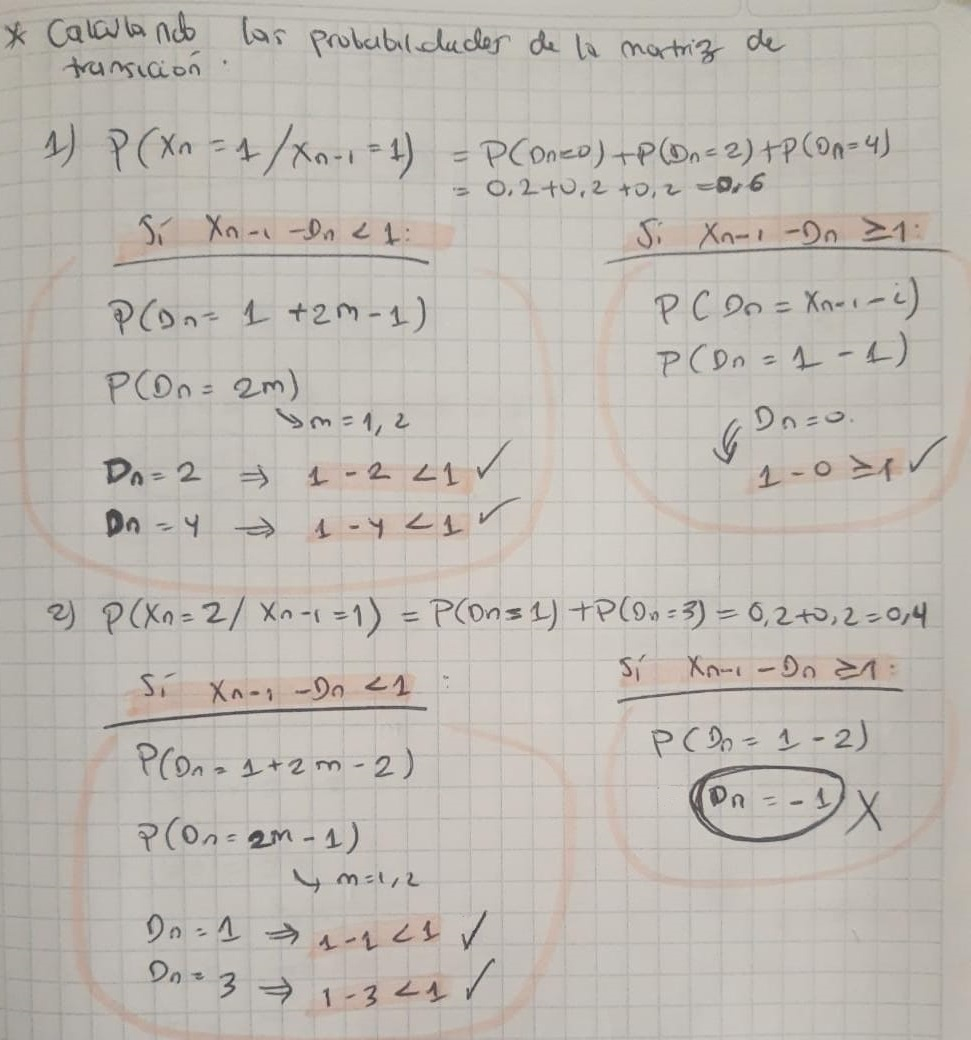

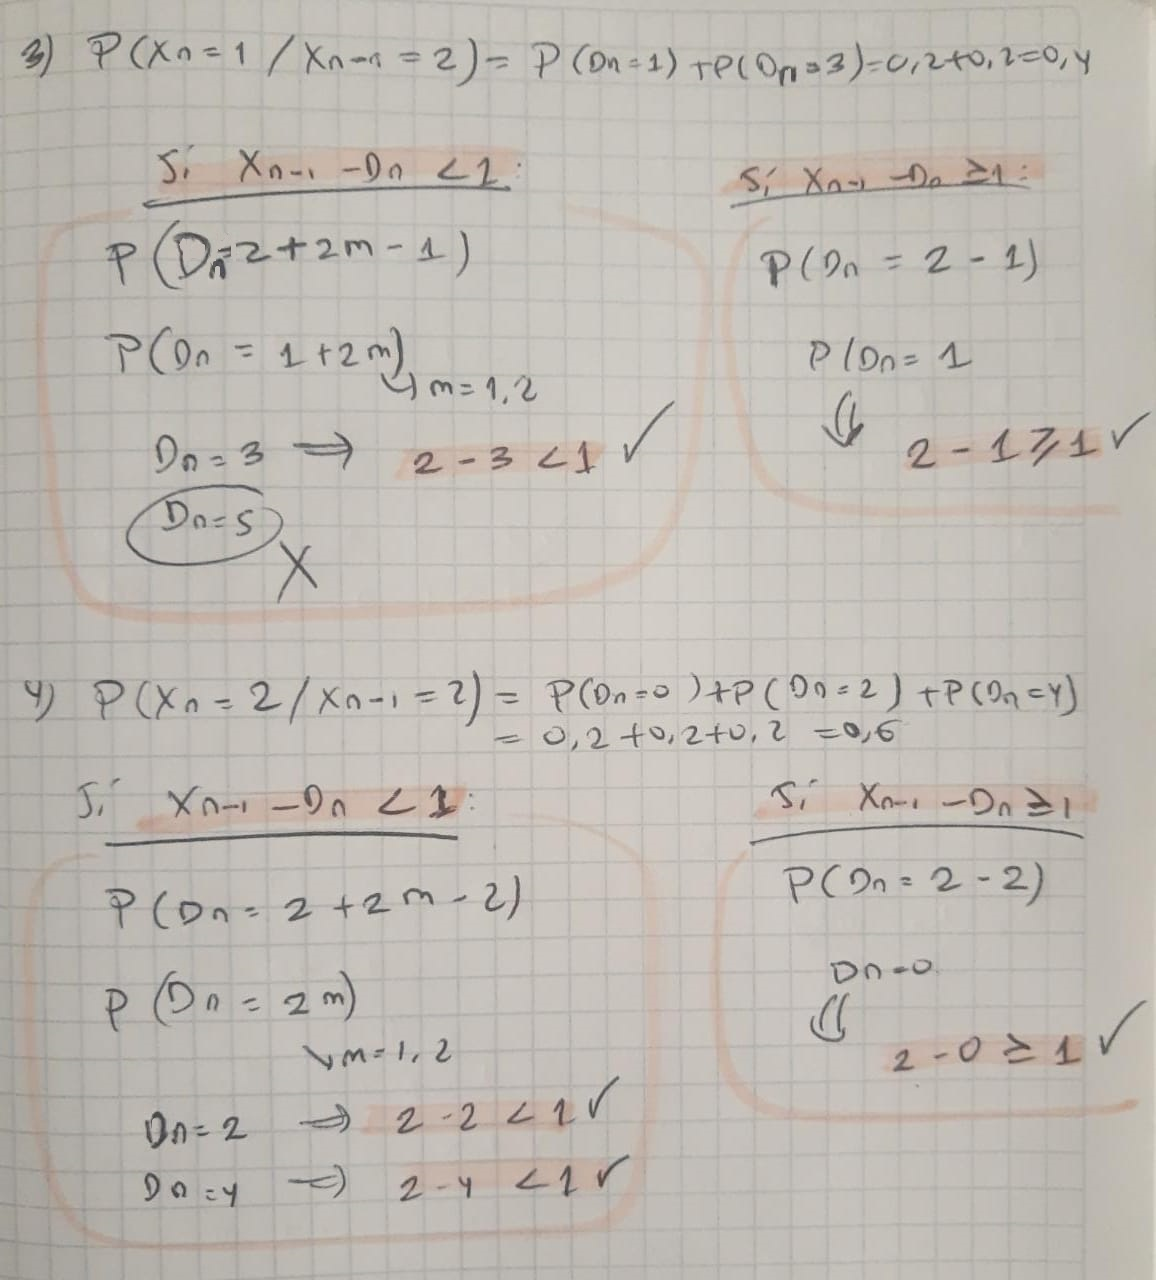

In [ ]:
P=np.array([[0.06, 0.04],[0.04 , 0.06]])
P

array([[0.06, 0.04],
       [0.04, 0.06]])

**Ejercicio b)**  Use las ecuaciones de estado estable para determinar a mano las probabilidades de estado estable.

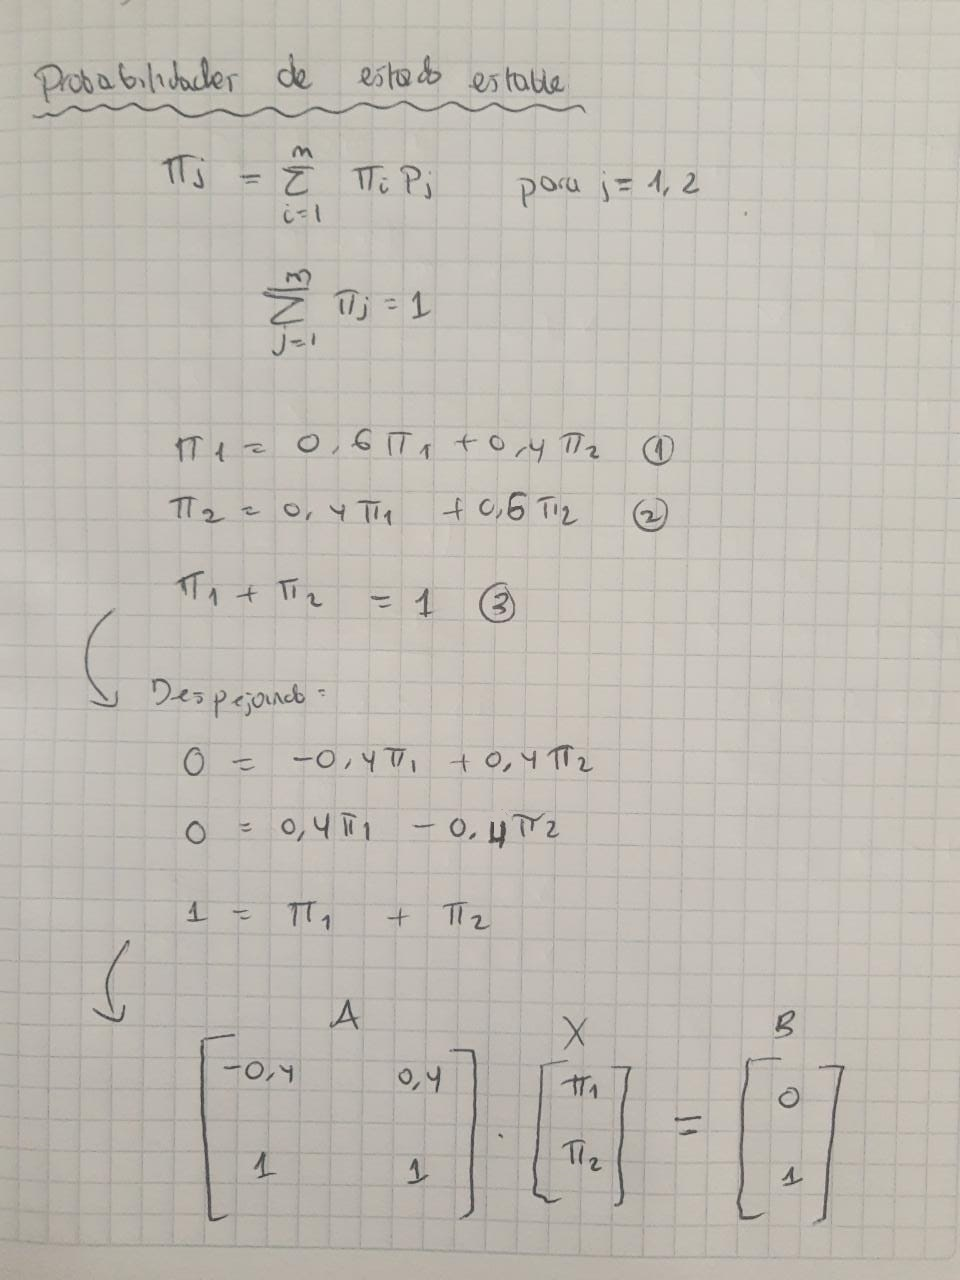

In [ ]:
A=np.array([[-0.4, 0.4],[1, 1]])
A

array([[-0.4,  0.4],
       [ 1. ,  1. ]])

In [ ]:
B=np.array([[0],[1]])
B

array([[0],
       [1]])

In [ ]:
IA=np.linalg.inv(A) #Inversa de la matriz A

IA

array([[-1.25,  0.5 ],
       [ 1.25,  0.5 ]])

In [ ]:
X=IA.dot(B)
X

array([[0.5],
       [0.5]])

**Simulando el ejercicio**

In [ ]:
periodos = 500 #número de períodos a simular

Z = []  #Almacena el inventario inicial del periodo antes de ordenar (inventario actual - faltantes)
X = []  #Almacena el inventario final del periodo despues de ordenar
D = []  #Almacena la demanda
P = []  #Almacena los pedidos

#DATOS INICIALES
Z.append(0)
X.append(2)
D.append(0) #se asume que la demanda inicial es 0 debido a que apenas arranca el negocio
P.append(2) #se asume que hubo un pedido inicial de 2 debido a que el Xn=2

for i in range(1, periodos+1):
  m  = 0  #inicializando la variable de la que depende el pedido
  d  = rnd.randint(0,4) #generando un valor de demanda aleatorio 
  D.append(d)
  Z.append(X[i-1] - d)

  #Evaluando las diferentes posibilidades de 
  if Z[i] < 1: #ORDENAR PEDIDO
    while Z[i] + 2*m < 1:
      m += 1
  
  if X[i-1] - d < 1:       
    X.append(X[i-1]-d+2*m) # se ordena pedido y se actualiza el inventario 
  
  else:
    X.append(X[i-1]-d) # se actualiza el inventario
  
  P.append(2*m)

In [ ]:
data={
    'periodo=n': np.arange(periodos+1),
    'Xn': X,
    'Zn': Z,
    'Demanda': D,
    'Pedidos': P
}
dataframe=pd.DataFrame(data)
dataframe

,periodo=n,Xn,Zn,Demanda,Pedidos
0,0,2,0,0,2
1,1,2,2,0,0
2,2,1,-1,3,2
3,3,1,1,0,0
4,4,2,-2,3,4
...,...,...,...,...,...
496,496,1,-1,2,2
497,497,1,-1,2,2
498,498,1,1,0,0
499,499,2,0,1,2


In [ ]:
#Según la teoría de Markov, el estado estable se logra después de un numero elevado de transiciones

cant_Xn_2 = contar_elemento(X, 2)
cant_Xn_1 = contar_elemento(X, 1)

print("Probabilidad del estado estable Xn=1",cant_Xn_1/periodos)
print("Probabilidad del estado estable Xn=2",cant_Xn_2/periodos)

Probabilidad del estado estable Xn=1 0.524
Probabilidad del estado estable Xn=2 0.478


3. Dado un programa que simule un proceso con eventos discretos, ¿qué mecanismos podría utilizar
para validar los promedios obtenidos de las variables de interés? Explicar de manera general el
proceso. Que mecanismos podría usar para validar que un conjunto de datos aleatorios continuos se
comporta como un distribución dada? Explicar también de manera general este proceso.

###**Los mecanismos que se podrían utilizar para validar los promedios obtenidos de las variables de interés son el Bootstraping y la validacion simple**

###1) Bootstraping
El bootstrap o estimación de Monte Carlo es un método de remuestreo no paramétrico propuesto por Bradley Efron en 1979. La idea central de este método es simple; dada una muestra aleatoria con n observaciones dicha muestra es tratada como si fuera toda la población de las cuál extraeremos B muestras con reemplazamiento. Estab tecnica se hace de la siguiente manera:
1. Se selecciona un estadístico de interés, sea 6 (media, mediana, correlacion, tasa de error -en analisis discriminante, por ejemplo-, etc.).
2. Se obtiene una muestra correspondiente a la realización de n variables aleatorias idéntica e independientemente distribuidas 
3. Se obtiene un valor de la variable aleatoria X. Iterando este proceso n veces, se obtiene un conjunto de datos que constituyen la denominada muestra bootstrap. Para cada una de estas muestras se obtiene el estadistico de interés 
4.  Repitiendo los pasos anteriores el número de veces que se determine,
supongamos que sean b ocasiones, se obtendra la cantidad correspondiente de
estimaciones del estadistico.
5.Una vez generadas las distintas muestras bootstrap, es factible realizar diferentes estimaciones del error estadistico, ademas de obtener estimaciones sobre parametros de interés.

###2) Validacion simple
El método más sencillo de validación consiste en repartir aleatoriamente las observaciones disponibles en dos grupos, uno se emplea para entrenar al modelo y otro para evaluarlo.  A continuacion se explica como llevar  a cabo  la validacion:
1. Se dividen las observaciones en dos grupos
2. Se verifica que haya proporcion entre los grupos
3. Se ajusta el modelo de entranamiento con datos obtenidos
4. Se hayan las predicciones y se encuentra el porcentaje de estimacion del error.

###**Los mecanismos que se podrían  usar para validar que un conjunto de datos aleatorios continuos se comporta como un distribución dada es  Chi-Cuadrado para distribuciones discretas y la Prueba de Kolmogorov–Smirnov para distribuciones continuas.**

La prueba de K-S es similar a lo que hace la prueba de Chi-Cuadrado, pero la prueba K-S tiene varias ventajas:

-Pruebas mas potentes.

-Más fácil de calcular y utilizar, ya que no requiere agrupación de datos.

-La estadística de prueba es independiente de la distribución de la frecuencia esperada. Sólo depende del tamaño de la muestra n.

###1) Chi-Cuadrado
Chi-Cuadrado es un procedimiento estadístico utilizado para determinar si existe una diferencia significativa entre los resultados esperados y los observados en una o más categorías. A continuacion se explica como llevar  a cabo la prueba a través de 5 pasos principales:
1. Define tus hipótesis nula y alternativa antes de iniciar la recolección de datos.
2. Decide cuál será el valor alfa. Esto implica decidir el riesgo que estás dispuesto a asumir de llegar a una conclusión errónea. Por ejemplo, supongamos que fijamos un valor α=0,05 para las pruebas de independencia. En este caso, has decidido un riesgo del 5 % de concluir que las dos variables son independientes, cuando en realidad no lo son.
3. Comprueba los datos para ver si hay errores.
4. Comprueba los supuestos de la prueba.
5. Realiza la prueba y obtén tus conclusiones.

###2) Kolmogorov–Smirnov
La Prueba de Kolmogorov–Smirnov es una prueba no paramétrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.
El procedimiento a seguir en la aplicación práctica de la prueba de Kolmogorov-Smirnov es el siguiente:

1. Determinar la frecuencia observada acumulada y la frecuencia téorica acumulada, Po(x) y P(x).
2. En cada caso, calcular: Dn = max | P(x) – Po(x) |
Así, Dn es la máxima diferencia entre la función de distribución acumulada de la muestra y la función de distribución acumulada teórica escogida
3. Fijar un nivel de probabilidad o de significancia α. Los valores de 0.05 y 0.01 son los más usuales.
4. Determinar el valor crítico Dα en la tabla correspondiente.
5. Aplica el criterio de decisión:
 Si el valor calculado Dn es menor que el Dα, se acepta la hipótesis nula (Ho) que establece que la serie de datos se ajusta a la distribución teórica escogida.

  Si el valor calculado Dn es mayor que el Dα, se rechaza la hipótesis nula   (Ho) y se acepta la hipótesis alternativa (Ha) que establece que la serie de datos no se ajusta a la distribución teórica escogida.


4. Modificar un ejemplo de implementación del muestreo de Gibbs (por ejemplo el que se encuentra
en https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/) para que genere
muestras de una distribución que consista en la multiplicación de dos exponenciales con una tasa λ
(pueden poner un valor específico). ¿Qué otra forma existe para generar muestras de una
distribución así?

### Muestras con una  distribución: Multiplicacion de dos exponenciales

In [ ]:
# Muestras con una  distribución: Multiplicacion de dos exponenciales

#cantidad de datos
n=500

#parámetros
lda=0.5

#valores iniciales
x_0 = np.empty([n+1])
x_1 = np.empty([n+1])
x_0[0] = 5
x_1[0] = 10

#generando aleatorios apartir de los valores iniciales

for i in range(1,n,2):

    x_0[i] = (-1/lda)*math.log(rnd.random())*(-1/lda)*math.log(rnd.random())
    x_1[i] = x_1[i-1]

    x_1[i+1] = (-1/lda)*math.log(rnd.random())*(-1/lda)*math.log(rnd.random())
    x_0[i+1] = x_0[i]

#Datos estadídticos
print('Mínimo x_0:',np.min(x_0))
print('Máximo x_0:',np.max(x_0))
print('Media x_0:',np.mean(x_0))
print('Desviación x_0:',np.std(x_0))

print('\nMínimo x_1:',np.min(x_1))
print('Máximo x_1:',np.max(x_1))
print('Media x_1:',np.mean(x_1))
print('Desviación x_1:',np.std(x_1))

print('\nCatidad de números:',len(x_0))

Mínimo x_0: 0.0007511315818046239
Máximo x_0: 28.48469131146187
Media x_0: 3.8800122556525434
Desviación x_0: 5.447190194250357

Mínimo x_1: 0.0007560369198683542
Máximo x_1: 62.26794753063424
Media x_1: 4.341366934265448
Desviación x_1: 6.81509888549685

Catidad de números: 501


### **Otra forma que existe para generar muestras como las anteriores:** Muestras con una distribución Erlang

In [150]:
#cantidad de datos
n=500

#parámetros
lda=0.25
k=1

#generación de números aleatorios
aleatorios=[]
iter=0
while iter<n:
  sum1=0
  for _ in range(0,k):
    x = - ((1/lda)*math.log(rnd.random()))
    sum1 = sum1 + x
  aleatorios.append(sum1)
  iter+=1

print(aleatorios)

#Datos estadídticos
print('Mínimo:',np.min(aleatorios))
print('Máximo:',np.max(aleatorios))
print('Media:',np.mean(aleatorios))
print('Desviación:',np.std(aleatorios))
print('Catidad de números:',len(aleatorios))

[6.04692992755729, 0.5873271805378687, 7.78521217608752, 9.48659419234897, 8.086257834416791, 1.3755579024334192, 1.1026710494383156, 2.990957891144855, 2.1005384405752814, 6.095090903752391, 2.5923939192531607, 1.9240195456975242, 12.041581315933561, 1.110602147752843, 1.5858934108087557, 8.300307655875361, 3.43337818556142, 1.709218140977926, 6.542002298403368, 3.9002307536257, 5.373047071535566, 2.8844085973518045, 0.7027910526466205, 2.6345309275963404, 2.070816560318845, 5.192303152367164, 5.163971463082864, 11.802671235802192, 3.7854504882084408, 0.9283609961327572, 1.4470385634581897, 0.05773260584546252, 23.84053356609346, 4.032883391638137, 0.5845663022906696, 0.22916391073701614, 1.834560797622411, 5.163873142151953, 0.4628418823583298, 1.001192779268897, 0.041960753701074306, 0.631302900188181, 2.7862208004592057, 8.153745803086371, 0.13090489280426998, 1.8807853644275143, 0.2259440470793995, 2.157361441620386, 6.741392765148375, 13.306065167606285, 6.201392750248052, 0.0603

###Graficando distribuciones

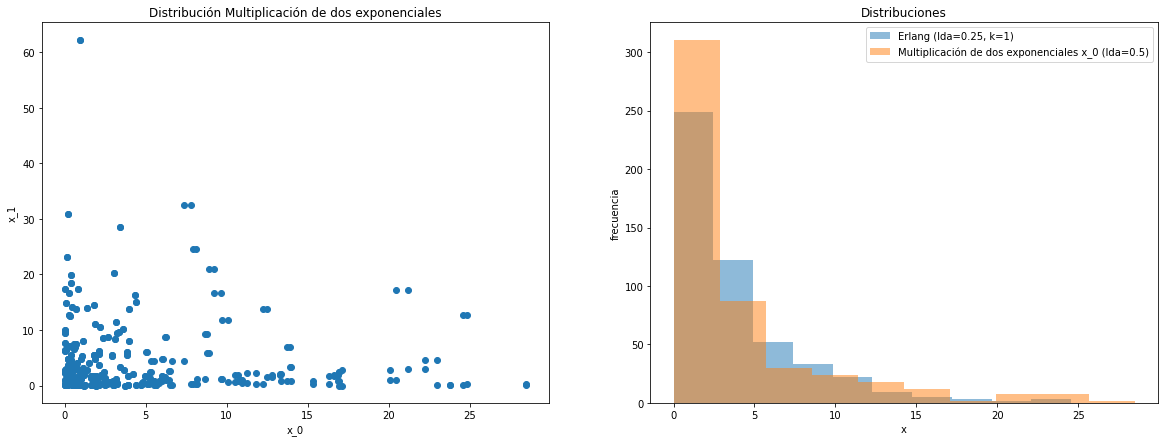

In [151]:
plt.figure(figsize=(20,7))

#graficando x_0 y x_1 de la sitribución multiplicación de dos exponenciales
plt.subplot(1,2,1)
plt.plot(x_0, x_1, 'o')
plt.title("Distribución Multiplicación de dos exponenciales")
plt.xlabel("x_0")
plt.ylabel("x_1")

#datos del histograma
aleatorios=np.sort(aleatorios)
categorias_1 = round(1 + (math.log(len(aleatorios)))/(math.log(2)))
x_0=np.sort(x_0)
categorias_2 = round(1 + (math.log(len(x_0)))/(math.log(2)))

plt.subplot(1,2,2)
plt.hist(x=aleatorios, bins=categorias_1, alpha=0.5)
plt.hist(x=x_0, bins=categorias_2, alpha=0.5)
plt.title("Distribuciones")
plt.xlabel("x")
plt.ylabel("frecuencia")

labels= ["Erlang (lda=0.25, k=1)","Multiplicación de dos exponenciales x_0 (lda=0.5)"]
plt.legend(labels)

plt.show()

##Bibliografia
- https://simulacionutp2016.wordpress.com/2016/10/01/prueba-kolmogorov-smirnov/
- https://www.questionpro.com/blog/es/prueba-de-chi-cuadrado-de-pearson/#:~:text=%C2%BFQu%C3%A9%20es%20una%20prueba%20de,en%20una%20o%20m%C3%A1s%20categor%C3%ADas.
- https://lasug.wordpress.com/2009/06/10/bootstrap-en-3-pasos/